In [4]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [6]:
data.sample(10)

,headlines,text
792,"RSS mother ship of BJP, wants to control insti...",Addressing 'The Odisha Dialogue' programme in ...
68156,Lenskart invests $1 mn in US-based 3D face mod...,Online eyewear retailer Lenskart has invested ...
55446,PM Modi attends Virat-Anushka's Delhi wedding ...,Prime Minister Narendra Modi on Thursday atten...
11779,"Cashback worth Ã¢ÂÂ¹5,400 during Jio-OnePlus ...","nAhead of OnePlus 6T's launch, Reliance Jio ha..."
65406,Why is Hema Malini referred to as Dream Girl?,Actress Hema Malini got the nickname Dream Gir...
20655,"Illegal bungalows of Nirav Modi, Choksi to be ...",The Maharashtra government on Tuesday ordered ...
41959,"Cigarette, tobacco smuggling cases rise 136% i...",Incidents of cigarettes and other tobacco prod...
14259,Couple transporting body parts admits to killi...,A couple caught in Mexico transporting human b...
89152,Aamir wrote 2-pg note appreciating my work in ...,Actress Sanya Malhotra has revealed that co-ac...
50522,Drug lord promises to not kill jurors at upcom...,Mexican drug lord Joaquin 'El Chapo' Guzman ha...


In [7]:
data.rename(columns={'headlines':'summary'},inplace=True)
data.sample(10)

,summary,text
28424,"Google to train gaming startups from India, So...",Technology giant Google has announced a four-m...
14829,"Shaw 1st to slam a ton each on Ranji, Duleep T...",Eighteen-year-old opener Prithvi Shaw has beco...
66235,North Korean hackers stole US-South Korea war ...,North Korean hackers stole classified military...
23396,Delhi has most fake engineering colleges in In...,India has 277 fake colleges offering engineeri...
21248,Harmanpreet Kaur breaks van's window with six ...,India women's T20 captain Harmanpreet Kaur bro...
62715,E-learning platform Meritnation raises $5.8 mi...,Delhi-headquartered e-learning platform Meritn...
55571,Cong moves no-trust motion against BJP govt in...,Congress has moved a no-confidence motion agai...
97015,Will back LK Advani or Sushma Swaraj for Prez'...,West Bengal CM Mamata Banerjee has said that s...
81010,Luxury house Louis Vuitton unveils 1st smartwa...,French luxury fashion house Louis Vuitton has ...
12294,Grateful to PM: Maneka on GoM to combat sexual...,"Union Minister Maneka Gandhi said she is ""very..."


In [8]:
len(data)

98401

## 1.데이터 전처리하기 (1) 데이터 정리하기

## 중복검사, Null값 제거

In [10]:
print(data['summary'].nunique())
print(data['text'].nunique())

98280
98360


In [145]:
data.drop_duplicates(subset=['text'], inplace=True)
len(data)

89739

In [146]:
data.isnull().sum()

summary           0
text              0
decoder_input     0
decoder_target    0
dtype: int64

## 텍스트 정규화와 불용어 제거

In [13]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [14]:
print(len(stopwords.words('english')))
print(stopwords.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [15]:
def preprocessing_sentence(sentence,remove_stopwords=True):
    sentence = sentence.lower()
    sentence = BeautifulSoup(sentence, 'lxml').text
    sentence = re.sub(r'\([^)]*\)',r'',sentence)
    sentence = re.sub(r'"',r'',sentence)
    sentence = ' '.join([contractions[i] if i in contractions else i for i in sentence.split()])
    sentence = re.sub(r"'s\b",r'',sentence)
    sentence = re.sub(r'[^a-zA-Z]', r' ',sentence)
    sentence = re.sub(r'[m]{2,}',r'mm',sentence)
    
    if remove_stopwords : 
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    else :
        tokens =' '.join([i for i in sentence.split() if len(i)>1]) 
    return tokens

In [16]:
preprocessing_sentence(data['text'][21434])

'mithali raj rewarded team manager recording first test double hundred indian woman august mithali scored england set world record highest score women test cricket year old remains indian woman hit test double ton'

In [17]:
clean_text =[]
for s in data['text']:
    clean_text.append(preprocessing_sentence(s))

clean_text[:5]

['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers',
 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit',
 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history',
 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical il

In [18]:
clean_summary = []
for s in data['summary']:
    clean_summary.append(preprocessing_sentence(s,remove_stopwords=False))

clean_summary[:5]

['upgrad learner switches to career in ml al with salary hike',
 'delhi techie wins free food from swiggy for one year on cred',
 'new zealand end rohit sharma led india match winning streak',
 'aegon life iterm insurance plan helps customers save tax',
 'have known hirani for yrs what if metoo claims are not true sonam']

In [19]:
import numpy as np
data['text'] = clean_text
data['summary'] = clean_summary
data.replace('',np.nan, inplace=True)

In [20]:
data.isnull().sum()

summary    0
text       0
dtype: int64

In [21]:
data.dropna(axis=0, inplace=True)
len(data)

98360

## 2. 데이터 전처리하기 (2) 훈련데이터와 테스트데이터 나누기

## 샘플의 최대 길이 정하기

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


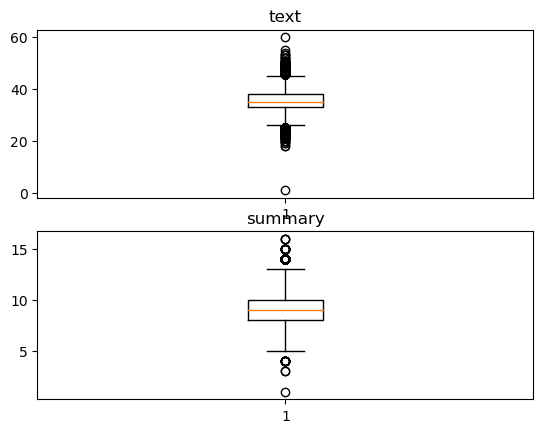

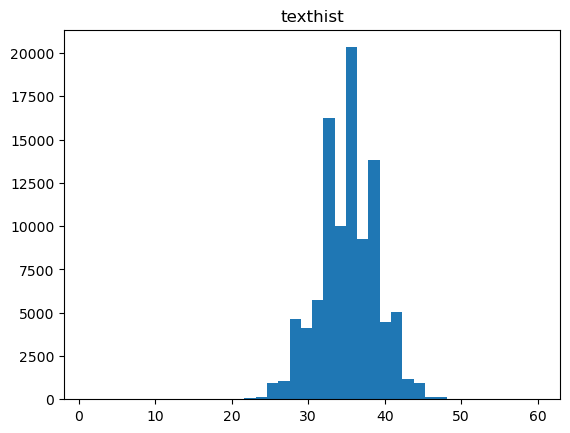

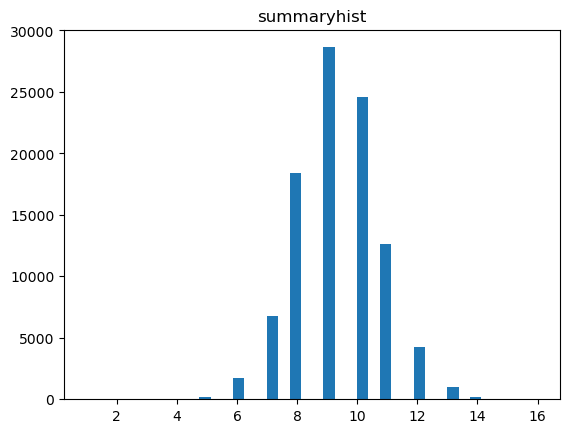

In [22]:
text_len =[len(i.split()) for i in data['text']]
summary_len = [len(i.split()) for i in data['summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(2,1,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(2,1,2)
plt.boxplot(summary_len)
plt.title('summary')
plt.show()

plt.hist(text_len, bins=40)
plt.title('texthist')
plt.show()
plt.hist(summary_len, bins=40)
plt.title('summaryhist')
plt.show()

In [23]:
text_max_len = 40
summary_max_len = 12

In [24]:
def below_threshold_len(max_len, data):
    cnt = 0
    for i in data:
        if len(i.split()) <= max_len :
            cnt +=1
    print('길이가 {}이하인 샘플의 비율:{}'.format(max_len, (cnt/len(data))))

In [25]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len, data['summary'])

길이가 40이하인 샘플의 비율:0.9238714924766165
길이가 12이하인 샘플의 비율:0.9880337535583571


In [26]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 89775


## 시작 토큰과 종료 토큰 추가하기

In [27]:
data['decoder_input'] =data['summary'].apply(lambda x:'sostoken '+x)
data['decoder_target'] = data['summary'].apply(lambda x: x+ ' eostoken')
data.head()

,summary,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
6,india get all out for their lowest odi total i...,india recorded lowest odi total new zealand ge...,sostoken india get all out for their lowest od...,india get all out for their lowest odi total i...


In [28]:
encoder_input = np.array(data['text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [29]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[47697 46790 78750 ... 32629 52860 67553]


In [30]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

encoder_input[:5]

array(['responding crore defamation notice sent honeypreet insaan mother rakhi sawant said going sue crore evidence regarding allegations honeypreet father added honeypreet mother sent notice rakhi defaming daughter making allegations honeypreet links gurmeet ram rahim',
       'supreme court annulling couple marriage recently barred duo posting pictures social media court took decision woman expressed apprehensions former husband might try harm reputation posting pictures husband also directed pay lakh wife final settlement',
       'sixteenth century italian scientist galileo galilei threw different mass leaning tower pisa establish scientific principle principle later described albert einstein states bodies fall way subject gravity australia based scientist magdalena zych tested equivalence principle quantum states superimposed acted similar way',
       'flower bouquets presented prime minister narendra modi tours within india according new guidelines issued ministry home affairs e

In [31]:
n_of_val = int(len(encoder_input) *0.2)
print(n_of_val)

17955


In [32]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 71820
훈련 레이블의 개수 : 71820
테스트 데이터의 개수 : 17955
테스트 레이블의 개수 : 17955


## 2. 데이터 전처리하기 (3) 정수 인코딩

In [33]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [34]:
src_tokenizer.word_index['samsung']

2143

In [54]:
threshold = 12
total_cnt = len(src_tokenizer.word_index)
rare_cnt=0
total_freq=0
rare_freq=0
for key, value in src_tokenizer.word_counts.items():
    total_freq += value
    
    if value < threshold:
        rare_cnt += 1
        rare_freq +=value
print('단어 집합의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold-1 , rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우 단어 집합의 크기:', (total_cnt - rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/ total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 비율:', (rare_freq/total_freq) *100)

단어 집합의 크기: 65646
등장 빈도가 9번 이하인 희귀 단어의 수 : 48320
단어 집합에서 희귀 단어를 제외시킬 경우 단어 집합의 크기: 17326
단어 집합에서 희귀 단어의 비율: 73.60692197544405
전체 등장 빈도에서 희귀 단어 등장 비율: 4.814921331128849


등장빈도가 7번 이하인 단어의 수가 전체 집합의 70%이상을 차지하지만,   
전체 빈도에서 희귀 단어의 등장비율이 4%로 높지않으므로, 단어 집합의 크기는 19000으로 제한하겠습니다.

In [36]:
src_vocab = 19000
src_tokenizer =Tokenizer(num_words = src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

In [37]:
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)
print(encoder_input_train[:5])

[[1053, 19, 2999, 776, 326, 5133, 272, 4155, 5463, 1, 379, 7732, 19, 1166, 1530, 434, 5133, 225, 3, 5133, 272, 326, 776, 4155, 9224, 262, 239, 434, 5133, 2487, 3464, 357, 2144], [163, 18, 449, 726, 200, 2666, 1606, 1939, 557, 153, 107, 18, 72, 277, 54, 1899, 17327, 30, 412, 1109, 1732, 3828, 5180, 1939, 557, 412, 6, 235, 276, 63, 150, 256, 3072], [1032, 1662, 3763, 2403, 485, 1410, 11115, 2375, 4532, 4792, 7598, 7598, 151, 1553, 6407, 4126, 294, 1339, 1917, 268, 3223, 5237, 187, 45, 3763, 2596, 7598, 4880, 294, 17328, 4156, 956, 268], [9848, 16472, 2174, 164, 15, 121, 52, 7467, 305, 2, 49, 25, 2901, 306, 212, 133, 595, 34, 62, 52, 67, 9, 2261, 8247, 749, 38, 2642, 7034, 2095, 9848, 16472, 436, 10302, 114], [30, 343, 6104, 77, 73, 11116, 15745, 186, 488, 479, 1029, 488, 371, 367, 324, 395, 1135, 11403, 8076, 3278, 11116, 162, 3635, 4576, 16473, 8400, 6104, 2119, 610, 10303, 1775, 1606, 6645, 610, 2608]]


In [38]:
tar_tokenizer =Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [39]:
threshold = 7
total_cnt = len(tar_tokenizer.word_index)
rare_cnt=0
total_freq=0
rare_freq=0
for key, value in tar_tokenizer.word_counts.items():
    total_freq += value
    
    if value < threshold:
        rare_cnt += 1
        rare_freq +=value
print('단어 집합의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold-1 , rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우 단어 집합의 크기:', (total_cnt - rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/ total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 비율:', (rare_freq/total_freq) *100)

단어 집합의 크기: 28802
등장 빈도가 6번 이하인 희귀 단어의 수 : 19729
단어 집합에서 희귀 단어를 제외시킬 경우 단어 집합의 크기: 9073
단어 집합에서 희귀 단어의 비율: 68.4987153669884
전체 등장 빈도에서 희귀 단어 등장 비율: 5.609945947708246


In [40]:
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words= tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 24, 2125, 3181, 272, 5, 32, 2203, 5303], [1, 66, 1470, 396, 13, 2298, 592, 595, 926], [1, 2251, 2545, 216, 3, 5795, 642], [1, 22, 367, 8360, 3, 1629, 23, 41], [1, 3873, 7274, 555, 7, 927, 6, 6825, 2349]]
target
decoder  [[24, 2125, 3181, 272, 5, 32, 2203, 5303, 2], [66, 1470, 396, 13, 2298, 592, 595, 926, 2], [2251, 2545, 216, 3, 5795, 642, 2], [22, 367, 8360, 3, 1629, 23, 41, 2], [3873, 7274, 555, 7, 927, 6, 6825, 2349, 2]]


## 인코딩으로 인한 빈 샘플 제거
빈도수가 적은 단어로 이루어진 문장의 경우 빈 샘플이 될 수 있습니다. 요약문의 경우 특히나 그렇기 때문에 빈 샘플을 찾겠습니다.

In [41]:
drop_train =[index for index, value in enumerate(decoder_input_train) if len(value) ==1]
drop_test = [index for index, value in enumerate(decoder_input_test) if len(value) ==1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0


In [42]:
encoder_input_train = [value for index, value in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [value for index, value in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [value for index, value in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]


print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 71819
훈련 레이블의 개수 : 71819
테스트 데이터의 개수 : 17955
테스트 레이블의 개수 : 17955


## 패딩하기

In [43]:
encoder_input_train = pad_sequences(encoder_input_train, padding='post', maxlen = text_max_len)
encoder_input_test = pad_sequences(encoder_input_test, padding='post', maxlen = text_max_len)

decoder_input_train = pad_sequences(decoder_input_train, padding='post', maxlen = summary_max_len)
decoder_input_test = pad_sequences(decoder_input_test, padding='post', maxlen = summary_max_len)

decoder_target_train = pad_sequences(decoder_target_train, padding='post', maxlen = summary_max_len)
decoder_target_test = pad_sequences(decoder_target_test, padding='post', maxlen = summary_max_len)


## 3. 모델 설계하기

### 인코더

In [178]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계시작
embedding_dim = 512
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len))
# 인코더의 임베딩층
enc_emb = Embedding(src_vocab,embedding_dim)(encoder_inputs)

# 인코더 LSTM1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state= True, dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더 LSTM1
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state= True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#인코더의 LSTM3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state = True, dropout = 0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


### 디코더

In [179]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))
# 디코더 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [180]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 40, 512)      9728000     ['input_33[0][0]']               
                                                                                                  
 lstm_28 (LSTM)                 [(None, 40, 512),    2099200     ['embedding_14[0][0]']           
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                           

## 어텐션 결합하기

디코더의 출력층에 어텐션을 결합하겠습니다. 여기서 사용하는 어텐션 함수는 Bahdanau스타일의 어텐션입니다.
어텐션 층을 만들고 위에서 설계한 디코더 출력층을 수정하겠습니다.

In [181]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션층(어텐션함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 timestep의 hiddenstate를 어텐션층에 전달하고 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 40, 512)      9728000     ['input_33[0][0]']               
                                                                                                  
 lstm_28 (LSTM)                 [(None, 40, 512),    2099200     ['embedding_14[0][0]']           
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                           

## 4. 모델 훈련하기

In [182]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor = 'val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y= decoder_target_train,
                   validation_data=([encoder_input_test, decoder_target_test], decoder_target_test),
                    batch_size=128, callbacks=[es], epochs=50)

Epoch 1/50
562/562 [==============================] - 69s 116ms/step - loss: 5.2250 - val_loss: 5.6039
Epoch 2/50
562/562 [==============================] - 67s 119ms/step - loss: 4.4529 - val_loss: 5.4135
Epoch 3/50
562/562 [==============================] - 68s 121ms/step - loss: 4.0369 - val_loss: 5.4438
Epoch 4/50
562/562 [==============================] - 68s 121ms/step - loss: 3.7469 - val_loss: 5.3462
Epoch 5/50
562/562 [==============================] - 69s 122ms/step - loss: 3.5264 - val_loss: 5.5281
Epoch 6/50
562/562 [==============================] - 69s 122ms/step - loss: 3.3404 - val_loss: 5.5594
Epoch 6: early stopping


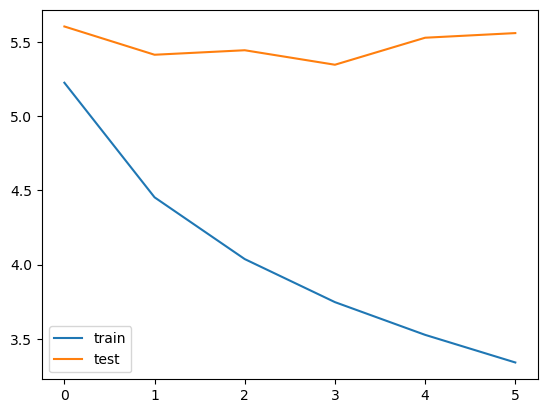

In [183]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

## 5. 인퍼런스 모델 구현하기

In [184]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [185]:
# 인코더 설계
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [186]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len,hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model([decoder_inputs]+[decoder_hidden_state_input, decoder_state_input_h,decoder_state_input_c],
                     [decoder_outputs2]+[state_h2, state_c2])

In [187]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq,verbose=0)
    
    # <sos> 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0,0] = tar_word_to_index['sostoken']
    
    stop_condition = False
    decoded_sentence =''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq]+[e_out, e_c, e_h],verbose=0)
        sampled_token_index = np.argmax(output_tokens[0,-1,:])
        sampled_token = tar_index_to_word[sampled_token_index]
        
        if (sampled_token != 'eostoken'):
            decoded_sentence += ' ' +sampled_token
        
        if (sampled_token == 'eostoken' or len(decoded_sentence.split()) >= (summary_max_len)-1):
            stop_condition = True
        
        target_seq = np.zeros((1,1))
        target_seq[0,0] = sampled_token_index
        e_h, e_c = h, c
        
    return decoded_sentence

## 6. 모델 테스트하기

In [188]:
# 원문 정수시퀀스 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        if i != 0:
            temp += src_index_to_word[i] + ' '
    return temp

# 요약문 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken'] and i!= tar_word_to_index['eostoken'])):
            temp += tar_index_to_word[i] + ' '
    return temp

In [189]:
for i in range(2000,2020):
    print('원문:',seq2text(encoder_input_test[i]))
    print('실제 요약:', seq2summary(decoder_input_test[i]))
    print('예측 요약:', decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print('\n')

원문: mumbai court friday acquitted delhi cm arvind kejriwal seven others allegedly holding political rally without required police permission lok sabha polls metropolitan magistrate pk deshpande observed police failed give written statement accused persons refusing permission rally 
실제 요약: arvind kejriwal acquitted in lok sabha poll rally case 
예측 요약:  curb kejriwal


원문: aam aadmi party saturday alleged clear evidence manipulation evms polling booths punjab assembly elections party appealed election commission cross verify results polling booths voter verified paper audit trail machines deployed paper trail 
실제 요약: there is clear evidence of evm aap 
예측 요약:  to evms evms ec


원문: year old employee housekeeping firm mumbai allegedly stabbed manager six times office paying salary accused reportedly also took wife daughters office request release salary money manager said critical condition 
실제 요약: mumbai man stabs manager times for refusing to pay salary 
예측 요약:  to pay duping posing scr

## 7. 추출적 요약 해보기
Summa 패키지의 summarize 모듈을 사용하여 추출적 요약을 진행하겠습니다.
>text (str) : 요약할 테스트.   
ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값   
words (int or None, optional) – 출력에 포함할 단어 수.   
만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.   
split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

In [155]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
temp = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [156]:
temp.sample(10)

,headlines,text
60716,Delhi MLAs tie protective mask on Mahatma Gand...,Suspended AAP MLA Kapil Mishra and SAD-BJP MLA...
64467,What are the health benefits of Iron in the body?,Lack of iron in the body could lead to fatigue...
69110,World's largest aircraft completes first engin...,The world's largest aircraft 'Stratolaunch' bu...
77393,Smoke in Delhi Metro train causes panic,Passengers panicked and deboarded a Delhi Metr...
93690,Trump calls man being dragged off plane incide...,US President Donald Trump has called the Unite...
67379,Psychopath Trump's acts will reduce US into fl...,"Describing US President Donald Trump as an ""ol..."
67307,"Kajol, Rani to make cameo in SRK's dwarf film:...","According to reports, five actresses including..."
22443,Ex-400m hurdles world champ dies in car crash ...,"Nicholas Bett, the former 400m hurdles world c..."
89249,"Indian startup's CEO claims being stalked, bul...","Vijay Nair, Founder and CEO of Mumbai-based ne..."
6088,Court rules Obamacare unconstitutional; Trump ...,A US federal judge on Friday ruled that the Af...


## 원본 사용 비율 제한

In [192]:
from summa.summarizer import summarize
for i in range(2000,2020):
    print('원문:',temp['text'][i])
    print('실제 요약:' ,temp['headlines'][i])
    print('예측 요약:', summarize(temp['text'][i], ratio=0.4))
    print('\n')

원문: Deutsche Bank's India Chief Executive Officer (CEO) Ravneet Singh Gill is reportedly the frontrunner for private sector lender Yes Bank's CEO post. Gill and Yes Bank Senior Group President Rajat Monga were the candidates recommended by the lender's board to replace Rana Kapoor, reports added. The Reserve Bank of India has asked Kapoor to step down by January 31.
실제 요약: Deutsche Bank's India CEO in race for Yes Bank CEO: Reports
예측 요약: Gill and Yes Bank Senior Group President Rajat Monga were the candidates recommended by the lender's board to replace Rana Kapoor, reports added.


원문: The country's trade deficit narrowed to a 10-month low of $13.08 billion in December, compared with $14.20 billion in the year-ago period. Lower crude oil prices and falling gold demand reduced the burden on the import bill. Merchandise exports rose just 0.34% from a year earlier to $27.93 billion, while imports fell 2.44% to $41.01 billion during the month.
실제 요약: India's trade deficit hits 10-month l

## 단어 사용 제한

In [193]:
for i in range(2000,2020):
    print('원문:',temp['text'][i])
    print('실제 요약:' ,temp['headlines'][i])
    print('예측 요약:', summarize(temp['text'][i], words=15))
    print('\n')

원문: Deutsche Bank's India Chief Executive Officer (CEO) Ravneet Singh Gill is reportedly the frontrunner for private sector lender Yes Bank's CEO post. Gill and Yes Bank Senior Group President Rajat Monga were the candidates recommended by the lender's board to replace Rana Kapoor, reports added. The Reserve Bank of India has asked Kapoor to step down by January 31.
실제 요약: Deutsche Bank's India CEO in race for Yes Bank CEO: Reports
예측 요약: Gill and Yes Bank Senior Group President Rajat Monga were the candidates recommended by the lender's board to replace Rana Kapoor, reports added.


원문: The country's trade deficit narrowed to a 10-month low of $13.08 billion in December, compared with $14.20 billion in the year-ago period. Lower crude oil prices and falling gold demand reduced the burden on the import bill. Merchandise exports rose just 0.34% from a year earlier to $27.93 billion, while imports fell 2.44% to $41.01 billion during the month.
실제 요약: India's trade deficit hits 10-month l

## 회고
loss값이 5에서 줄지를 않았다. gpu메모리부족으로 batchsize를 256으로 돌리지 못하여 128로 고정하고 hidden_size와 embedding_dim을 늘리거나 줄여주었는데, 늘리던 줄이던 변화는 없었다. 전처리의 과정에서 문제가 있다고 판단했다.

번역내용은 처참했다. 실제번역과 전혀 다른 문장이 나온게 대다수였고, 단어를 추출하다 끝나거나 같은 말을 반복하거나 하였다. 때문에 문법은 당연히 맞지 않았다. 동사로 번역이 끝난 문장도 있었지만 핵심내용을 담지는 않았다.

추출적 요약은 문법적으로나 내용적으로나 문제가 없었다. 이유는 추출적요약은 추상적요약과 달리 원문을 있는 그대로 가져왔기 때문에 문제가 있을 수 없었다. 하지만 원문의 사용비율이나 단어수를 제한을 원문의 문장수, 단어수 보다 적게 두었을 때 요약을 하지 못하였다.